In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import urllib2

plt.style.use('ggplot')
np.random.seed(1)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # don't want first row (labels)

# chopping data based on thresholds on x and y coordinates
x_bounds = (409, 3529)
y_bounds = (1564, 3124)

def check_in_bounds(row, x_bounds, y_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]:
        return False
    if row[1] < y_bounds[0] or row[1] > y_bounds[1]:
        return False
    if row[3] == 0:
        return False

    return True

indices_in_bound, = np.where(np.apply_along_axis(check_in_bounds, 1, csv, x_bounds, y_bounds))
data_thresholded = csv[indices_in_bound]
n = data_thresholded.shape[0]
data = data_thresholded

In [2]:
import sklearn.mixture as mixture

# create vector of just densities
dens_vec = (data[:, 4]/data[:, 3])
# normalize
dens_vec = (dens_vec-np.average(dens_vec))/np.std(dens_vec)
dens_vec = np.reshape(dens_vec, (dens_vec.shape[0], 1))

max_clusters = 10
bic = np.array([])
i = np.array(range(1, max_clusters+1))
for idx in i:
    gmm = mixture.GMM(n_components=idx, n_iter=1000, covariance_type='diag')
    gmm.fit(dens_vec)
    bic = np.append(bic, gmm.bic(dens_vec))



In [3]:
n_clusters = 5
gmm = mixture.GMM(n_components=n_clusters, n_iter=1000, covariance_type='diag')
labels = gmm.fit_predict(dens_vec)
colors = ['b', 'g', 'r', 'c', 'm']

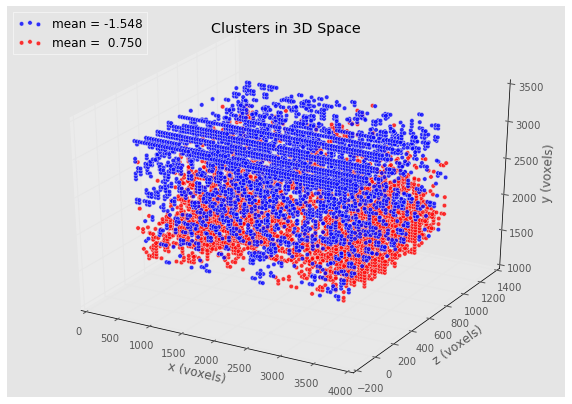

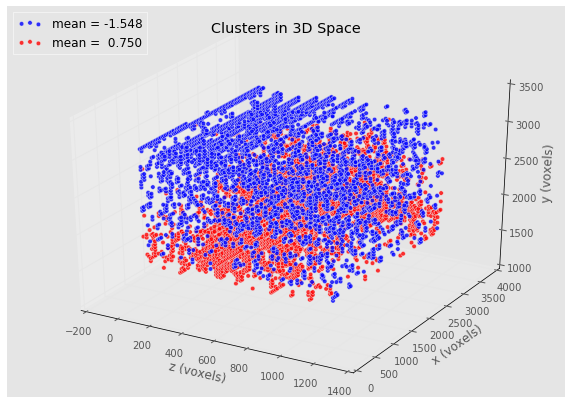

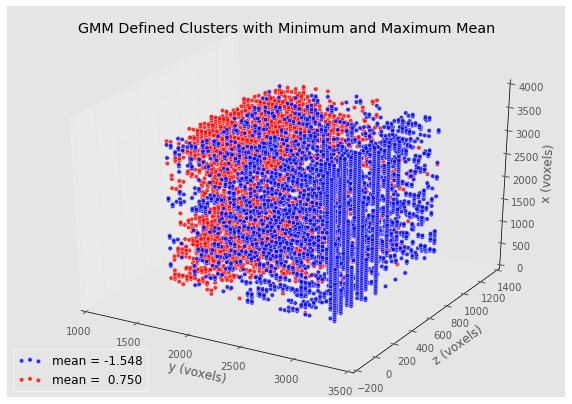

In [4]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
ax.view_init()
ax.dist = 10  # distance

for l, color in zip(range(n_clusters), colors):
    if not (l == 0 or l == 2): continue
    a = np.where(labels == l)
    lab = 'mean = ' + str(gmm.means_[l])[1:7]
    ax.scatter(data[a, 0], data[a, 2], data[a, 1],
               c=color,
               label=lab,
               alpha=.8)
ax.set_xlabel('x (voxels)')
ax.set_ylabel('z (voxels)')
ax.set_zlabel('y (voxels)')
plt.title('Clusters in 3D Space')
plt.legend(loc=2)
plt.show()

# rotated

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
ax.view_init()
ax.dist = 10  # distance

for l, color in zip(range(n_clusters), colors):
    if not (l == 0 or l == 2): continue
    a = np.where(labels == l)
    lab = 'mean = ' + str(gmm.means_[l])[1:7]
    ax.scatter(data[a, 2], data[a, 0], data[a, 1],
               c=color,
               label=lab,
               alpha=.8)
ax.set_xlabel('z (voxels)')
ax.set_ylabel('x (voxels)')
ax.set_zlabel('y (voxels)')
plt.title('Clusters in 3D Space')
plt.legend(loc=2)
plt.show()

# rotated

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
ax.view_init()
ax.dist = 10  # distance

for l, color in zip(range(n_clusters), colors):
    if not (l == 0 or l == 2): continue
    a = np.where(labels == l)
    lab = 'mean = ' + str(gmm.means_[l])[1:7]
    ax.scatter(data[a, 1], data[a, 2], data[a, 0],
               c=color,
               label=lab,
               alpha=.8)
ax.set_xlabel('y (voxels)')
ax.set_ylabel('z (voxels)')
ax.set_zlabel('x (voxels)')
plt.title('GMM Defined Clusters with Minimum and Maximum Mean')
plt.legend(loc=3)
plt.show()

In [5]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
import urllib2
import numpy as np

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:]

def check_condition(row):
    if row[3] == 0:
        return False
    return True

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
nonZeroMask = csv[a, :]

synDividedMask = np.divide(nonZeroMask[:,4],nonZeroMask[:,3])
synDividedMask = synDividedMask * (64**3)
accurateDataT = np.vstack((nonZeroMask[:,0],nonZeroMask[:,1],nonZeroMask[:,2],synDividedMask))
accurateData = accurateDataT.T

cleaned = accurateData[accurateData[:,0] >= 409]
cleaned = cleaned[cleaned[:,0] <= 3529]
cleaned = cleaned[cleaned[:,1] >= 1564]
cleaned = cleaned[cleaned[:,1] <= 3124]

length, width = cleaned.shape
print length
print width

36036
4


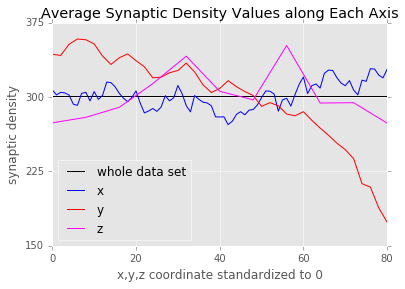

In [6]:
import math

divisionsx = np.unique(cleaned[:,0])
meanx = np.zeros((2,len(divisionsx)))

divisionsy = np.unique(cleaned[:,1])
meany = np.zeros((2,len(divisionsy)))

divisionsz = np.unique(cleaned[:,2])
meanz = np.zeros((2,len(divisionsz)))

maxlen = np.amax([len(divisionsx),len(divisionsy),len(divisionsz)])
xstep = np.divide(maxlen,len(divisionsx))
ystep = 2
zstep = 8

counter = 0
for d in divisionsx:
    slicex = cleaned[cleaned[:,0] == d]
    meanx[0,counter] = (counter)*xstep
    meanx[1,counter] = np.mean(slicex[:,3])
    counter += 1
    
counter = 0
for d in divisionsy:
    slicey = cleaned[cleaned[:,1] == d]
    meany[0,counter] = (counter)*ystep
    meany[1,counter] = np.mean(slicey[:,3])
    counter += 1
    
counter = 0
for d in divisionsz:
    slicez = cleaned[cleaned[:,2] == d]
    meanz[0,counter] = (counter)*zstep
    meanz[1,counter] = np.mean(slicez[:,3])
    counter += 1
    
#plot it
allmean = [301] * maxlen
fig,ax = plt.subplots()
ax.set_ylim([150,375])
ax.set_title('Average Synaptic Density Values along Each Axis')
ax.set_yticks([150,225,300,375])
ax.set_xticks([0,20,40,60,80])
ax.set_xlabel('x,y,z coordinate standardized to 0')
ax.set_ylabel('synaptic density')
ax.plot(allmean,label='whole data set',color='black')
ax.plot(meanx[0,:],meanx[1,:],label='x',color='blue')
ax.plot(meany[0,:],meany[1,:],label='y',color='red')
ax.plot(meanz[0,:],meanz[1,:],label='z',color='magenta')
legend = ax.legend(loc='lower left')

[ -1.151  11.256   5.299  -0.731  -4.266 -12.13   -8.529   6.754   3.87
  -6.869  -6.101 -11.096   0.626   4.467   2.237   7.492  -8.962 -12.884
  -7.842   4.103   7.88   -6.088  -4.872  -4.008 -10.934   3.753  -3.197
  -8.365  -1.651   4.076  -8.661  -7.858  -7.266  -7.974  -6.467  -9.197
 -25.165  -3.464 -20.893 -14.473]


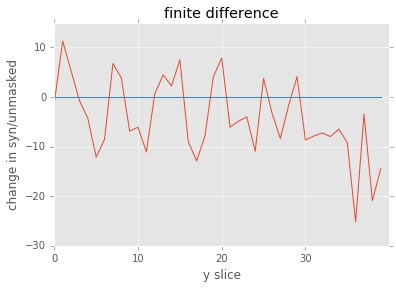

In [7]:
mean = meany[1,:]
mean1 = mean[:-1]
mean2 = mean[1:]
meandiff = mean2 - mean1
print meandiff
fig,ax = plt.subplots()
ax.plot(meandiff)
ax.plot([0] * len(meandiff))
ax.set_xlabel('y slice')
ax.set_ylabel('change in syn/unmasked')
ax.set_xticks(np.arange(0,40,10))
ax.set_yticks(np.arange(-30,15,10))
ax.set_title('finite difference')

In [8]:
from matplotlib import pyplot as plt
import numpy as np

import csv

data = open('../data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

sorted_x = sorted(list(set([r[0] for r in rows])))
sorted_y = sorted(list(set([r[1] for r in rows])))
sorted_z = sorted(list(set([r[2] for r in rows])))

vol = np.zeros((len(sorted_x), len(sorted_y), len(sorted_z)))
for r in rows:
    if r[-2] != 0:
        vol[sorted_x.index(r[0]), sorted_y.index(r[1]), sorted_z.index(r[2])] = r[-1]

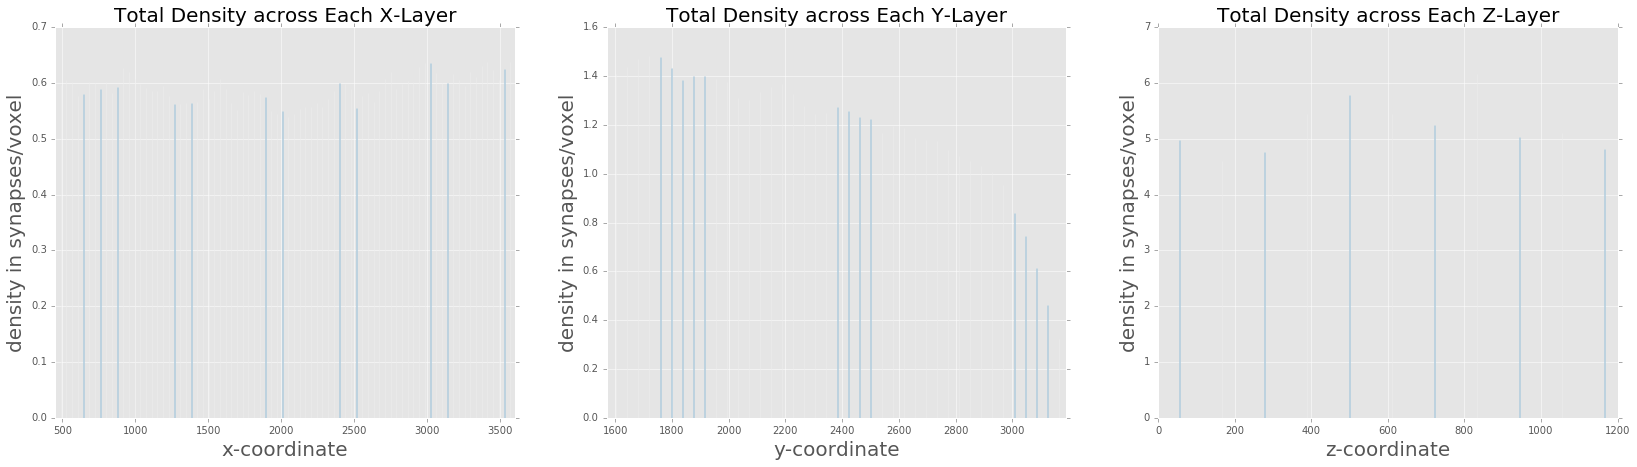

In [9]:
synden = np.zeros((len(sorted_x), len(sorted_y), len(sorted_z)))
for r in rows:
    if r[-2] != 0:
        synden[sorted_x.index(r[0]), sorted_y.index(r[1]), sorted_z.index(r[2])] = np.float(r[-1])/np.float(r[-2])

x_sum = [0] * len(synden[:,0,0])
for i in range(len(synden[:,0,0])):
    x_sum[i] = sum(sum(synden[i,:,:]))
    
y_sum = [0] * len(synden[0,:,0])
for i in range(len(synden[0,:,0])):
    y_sum[i] = sum(sum(synden[:,i,:]))
    
z_sum = [0] * len(synden[0,0,:])
for i in range(len(synden[0,0,:])):
    z_sum[i] = sum(sum(synden[:,:,i]))
    
unique_x = np.unique(sorted_x)
unique_y = np.unique(sorted_y)
unique_z = np.unique(sorted_z)

plt.figure()
plt.figure(figsize=(28,7))

plt.subplot(131)
plt.bar(unique_x, x_sum, 1)
plt.xlim(450, 3600)
plt.ylabel('density in synapses/voxel',fontsize=20)
plt.xlabel('x-coordinate',fontsize=20)
plt.title('Total Density across Each X-Layer',fontsize=20)

plt.subplot(132)
plt.bar(unique_y, y_sum, 1)
plt.xlim(1570, 3190)
plt.ylabel('density in synapses/voxel',fontsize=20)
plt.xlabel('y-coordinate',fontsize=20)
plt.title('Total Density across Each Y-Layer',fontsize=20)

plt.subplot(133)
plt.bar(unique_z, z_sum, 1)
plt.ylabel('density in synapses/voxel',fontsize=20)
plt.xlabel('z-coordinate',fontsize=20)
plt.title('Total Density across Each Z-Layer',fontsize=20)